In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [ ]:
url= "/content/Breastcancer.csv"
df= pd.read_csv(url)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x:'1' if x== 'M' else '0')
df=df.set_index('id')
del df['Unnamed: 32']

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


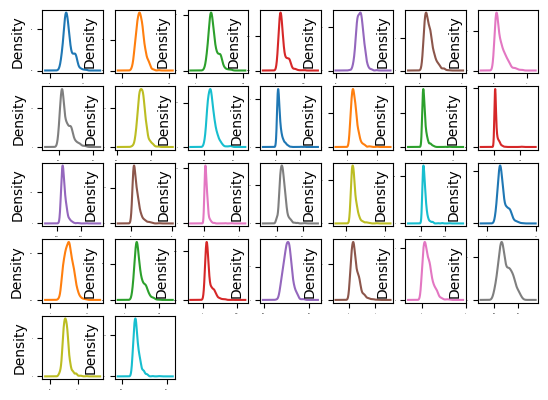

In [ ]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [ ]:
Y= df['diagnosis'].values
X= df.drop('diagnosis',axis=1).values
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size = 0.20 , random_state= 21)

In [ ]:
models_list=[]
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds,shuffle= True, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))




CART: 0.927440 (0.036651) (run time: 0.105374)
SVM: 0.916329 (0.035471) (run time: 0.058233)
NB: 0.940531 (0.031603) (run time: 0.023412)
KNN: 0.922947 (0.038805) (run time: 0.112338)


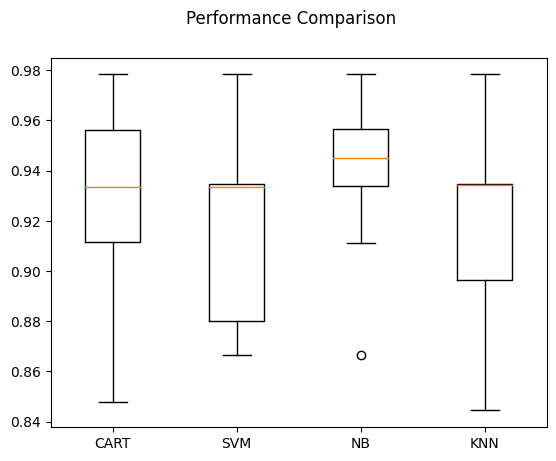

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds,shuffle= True, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.931787 (0.044219) (run time: 0.109278)
ScaledSVM: 0.966957 (0.029910) (run time: 0.074390)
ScaledNB: 0.929565 (0.038096) (run time: 0.032578)
ScaledKNN: 0.949469 (0.027808) (run time: 0.077065)


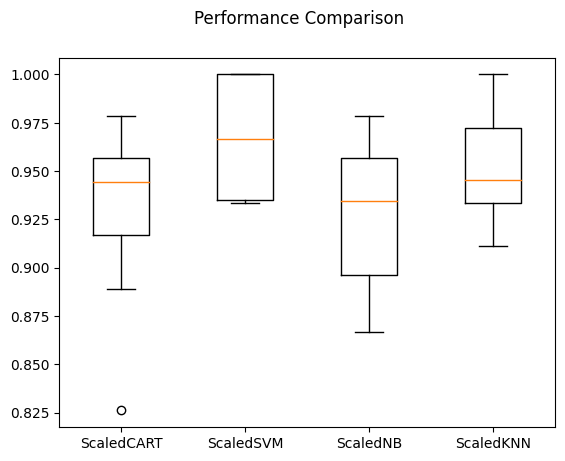

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds,shuffle= True ,random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969130 using {'C': 1.5, 'kernel': 'rbf'}
0.966908 (0.022890) with: {'C': 0.1, 'kernel': 'linear'}
0.828502 (0.050827) with: {'C': 0.1, 'kernel': 'poly'}
0.942850 (0.032841) with: {'C': 0.1, 'kernel': 'rbf'}
0.953768 (0.028890) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.3, 'kernel': 'linear'}
0.865845 (0.032091) with: {'C': 0.3, 'kernel': 'poly'}
0.953816 (0.026855) with: {'C': 0.3, 'kernel': 'rbf'}
0.956039 (0.031363) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.962512 (0.017495) with: {'C': 0.5, 'kernel': 'linear'}
0.878986 (0.030482) with: {'C': 0.5, 'kernel': 'poly'}
0.962560 (0.026103) with: {'C': 0.5, 'kernel': 'rbf'}
0.953816 (0.033601) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.7, 'kernel': 'linear'}
0.890048 (0.031450) with: {'C': 0.7, 'kernel': 'poly'}
0.962609 (0.027882) with: {'C': 0.7, 'kernel': 'rbf'}
0.951546 (0.036945) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.964734 (0.017877) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.007401


In [ ]:
 #estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
print(confusion_matrix(Y_test, predictions))

[[74  1]
 [ 0 39]]


In [ ]:
input_data = (19.54,22.43,87.46,1566.3,0.099779,0.18129,0.14664,0.09781,0.1585,0.05366,0.75829,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01315,0.0198,0.0023,11.11,19.26,99.7,711.2,0.944,0.1773,0.239,0.1288,0.2977,0.07259)

input_data_as_nparray = np.asarray(input_data)

input_data_modified = input_data_as_nparray.reshape(1,-1)

prediction = model.predict(input_data_modified)
print(prediction)

if (prediction[0] == 0):
  print('The Breast Cancer is characterized as being MALIGNANT')

else:
  print('The Breast Cancer is charecterized as being BENIGN')


In [ ]:
import pickle
# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(prediction, model_file)


In [ ]:
# Load the model from the file
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [ ]:
input_data = (19.54,22.43,87.46,1566.3,0.099779,0.18129,0.14664,0.09781,0.1585,0.05366,0.75829,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01315,0.0198,0.0023,11.11,19.26,99.7,711.2,0.944,0.1773,0.239,0.1288,0.2977,0.07259)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predictions = loaded_model.predict(input_data_reshaped)
